In [ ]:
import pandas as pd

df = pd.read_csv('dataset_longmethod.csv')
df.head()

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,LongMethod
0,coba.py,django-2.2,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django-2.2,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django-2.2,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django-2.2,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django-2.2,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0


# **PREPROCESING**

In [ ]:
df['project'] = df['project'].str.replace(r'-.*$', '', regex=True)

In [ ]:
df.head()

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,LongMethod
0,coba.py,django,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0


In [ ]:
df['project'].unique()

array(['django', 'matplotlib', 'numpy', 'scipy'], dtype=object)

# **DATASET SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

meta = df[["file", "version", "project"]]

X = df.drop(columns=["file", "version", "project", "LongMethod"])
y = df["LongMethod"]

X_train, X_test, y_train, y_test, meta_train, meta_test = train_test_split(
    X, y, meta, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
print("Fitur final:", X_train.columns.tolist())

Fitur final: ['lloc', 'sloc', 'comments', 'multi', 'blank', 'wmc', 'η1', 'η2', 'N1', 'N2', 'η', 'N', 'N_hat', 'V', 'D', 'E', 'T', 'B', 'cbo', 'lcom', 'DIT', 'rfc']


# **FEATURE SCALING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ModifiedZScoreScaler(BaseEstimator, TransformerMixin):
    """
    Modified Z-score scaling (median & MAD).
    Cocok untuk data skewed / outlier-heavy.
    """
    def fit(self, X, y=None):
        self.medians_ = X.median()
        self.mads_ = (np.abs(X - self.medians_)).median()
        self.mads_ = self.mads_.replace(0, 1e-9)
        return self

    def transform(self, X):
        return 0.6745 * (X - self.medians_) / self.mads_

In [ ]:
# before scaling
print("\n=== Sebelum Scaling ===")
print(X_train.head())

# Scaling
scaler = ModifiedZScoreScaler()
X_train_scaled = scaler.fit_transform(X_train)

# after scaling
print("\n=== Setelah Scaling ===")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


=== Sebelum Scaling ===
        lloc   sloc  comments  multi  blank   wmc   η1    η2    N1    N2  ...  \
9053   110.0  200.0       6.0    8.0   30.0  20.0  0.0   0.0   0.0   0.0  ...   
22372   14.0   49.0       0.0  121.0   35.0   0.0  0.0   0.0   0.0   0.0  ...   
14330   43.0   43.0       1.0    6.0   17.0   9.0  4.0  12.0   9.0  15.0  ...   
22628  132.0  141.0      16.0    2.0   23.0  18.0  9.0  19.0  13.0  24.0  ...   
11336   53.0   53.0      34.0   13.0   30.0   0.0  2.0   8.0   4.0   8.0  ...   

        N_hat        V      D         E       T         B   cbo  lcom  DIT  \
9053     0.00    0.000  0.000     0.000   0.000  0.000000  26.0   3.0  1.0   
22372    0.00    0.000  0.000     0.000   0.000  0.000000   0.0   0.0  0.0   
14330   51.02   96.000  2.500   240.000  13.333  0.032000  13.0   1.0  0.0   
22628  109.24  177.872  5.684  1011.063  56.170  0.059291   0.0   0.0  0.0   
11336   26.00   39.863  1.000    39.863   2.215  0.013288   0.0   0.0  0.0   

        rfc  
9053 

# **FEATURE SELECTION**

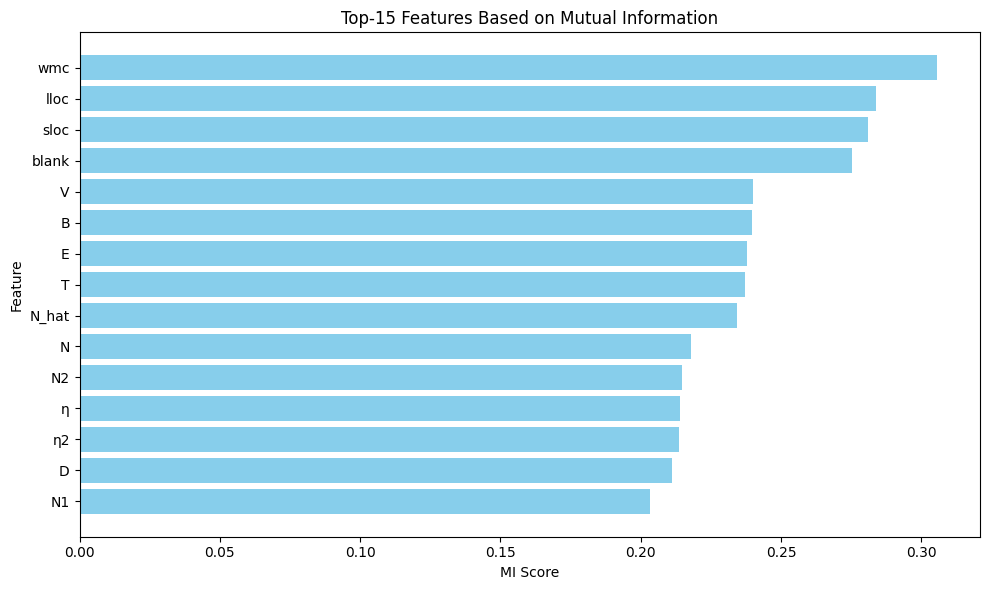

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def select_topk_features_MI(X, y, k):
    """
    Feature selection menggunakan Mutual Information.
    Mengambil k fitur teratas berdasarkan skor MI.
    """
    scores = mutual_info_classif(X, y, random_state=42)
    mi_series = pd.Series(scores, index=X.columns)
    selected = mi_series.nlargest(k).index.tolist()
    return selected, scores

selected_features, scores = select_topk_features_MI(X_train, y_train, k=15)

mi_df = pd.DataFrame({
    "feature": X_train.columns,
    "mi_score": scores
}).sort_values("mi_score", ascending=True)

mi_selected_df = mi_df[mi_df["feature"].isin(selected_features)]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(mi_selected_df["feature"], mi_selected_df["mi_score"], color='skyblue')
plt.title("Top-15 Features Based on Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **MODELING MACHINE LEARNING**

# **RANDOM FOREST**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

n_estimators_list = [100, 200, 300]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

mean_acc_results = []
mean_mcc_results = []

for n in n_estimators_list:

    print("\n\n======================")
    print(f"   n_estimators = {n}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    # Cross Validation of each hyperparameter tuning range
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # Random Forest
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=7,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        # Trian time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Predict time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_results.append(np.mean(acc_all))
    mean_mcc_results.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for n_estimators =", n)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")



   n_estimators = 100

===== Fold 1 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.98986
MCC: 0.95522
Training Time:  2.40107 sec
Prediksi Time:  0.06091 sec

===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.99041
MCC: 0.95752
Training Time:  1.47084 sec
Prediksi Time:  0.03562 sec

===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.98931
MCC: 0.95277
Training Time:  1.13809 sec
Prediksi Time:  0.03475 sec

===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.98712
MCC: 0.94343
Training Time:  1.06138 sec
Prediksi Time:  0.04602 sec

===== Fold 5 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_ha

**Visualitation of Evaluation Result of Each n_estimator**

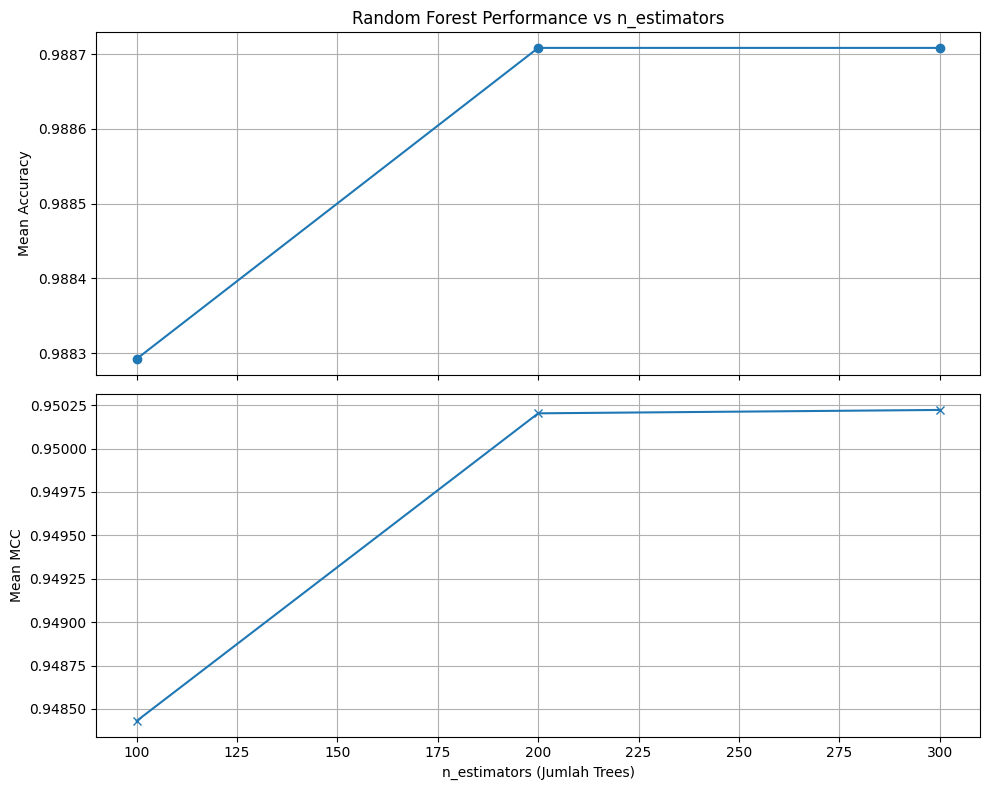

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_estimators_list, mean_acc_results, marker='o')
axes[0].set_ylabel('Mean Accuracy')
axes[0].set_title('Random Forest Performance vs n_estimators')
axes[0].grid(True)

# MCC
axes[1].plot(n_estimators_list, mean_mcc_results, marker='x')
axes[1].set_xlabel('n_estimators (Jumlah Trees)')
axes[1].set_ylabel('Mean MCC')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# **KNN**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np

n_neighbors_list = [1, 3, 5, 7, 9, 11]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

# Final results
mean_acc_knn = []
mean_mcc_knn = []
mean_train_knn = []
mean_pred_knn = []

for k in n_neighbors_list:

    print("\n\n======================")
    print(f"        K = {k}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        model = KNeighborsClassifier(
            n_neighbors=k,
            weights='distance',
            p=2
        )

        # Training time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Prediction time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} =====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time: {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_knn.append(np.mean(acc_all))
    mean_mcc_knn.append(np.mean(mcc_all))
    mean_train_knn.append(np.mean(train_time_all))
    mean_pred_knn.append(np.mean(predict_time_all))

    print("\n>>> RESULT for K =", k)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")



        K = 1

===== Fold 1 =====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.98027
MCC: 0.90806
Training Time:  0.02909 sec
Prediction Time: 0.06357 sec

===== Fold 2 =====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97999
MCC: 0.90647
Training Time:  0.02852 sec
Prediction Time: 0.05360 sec

===== Fold 3 =====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.98109
MCC: 0.91296
Training Time:  0.02885 sec
Prediction Time: 0.05595 sec

===== Fold 4 =====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.98027
MCC: 0.90944
Training Time:  0.02858 sec
Prediction Time: 0.07399 sec

===== Fold 5 =====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_h

**Visualitation of Evaluation Result of n_neighbors**

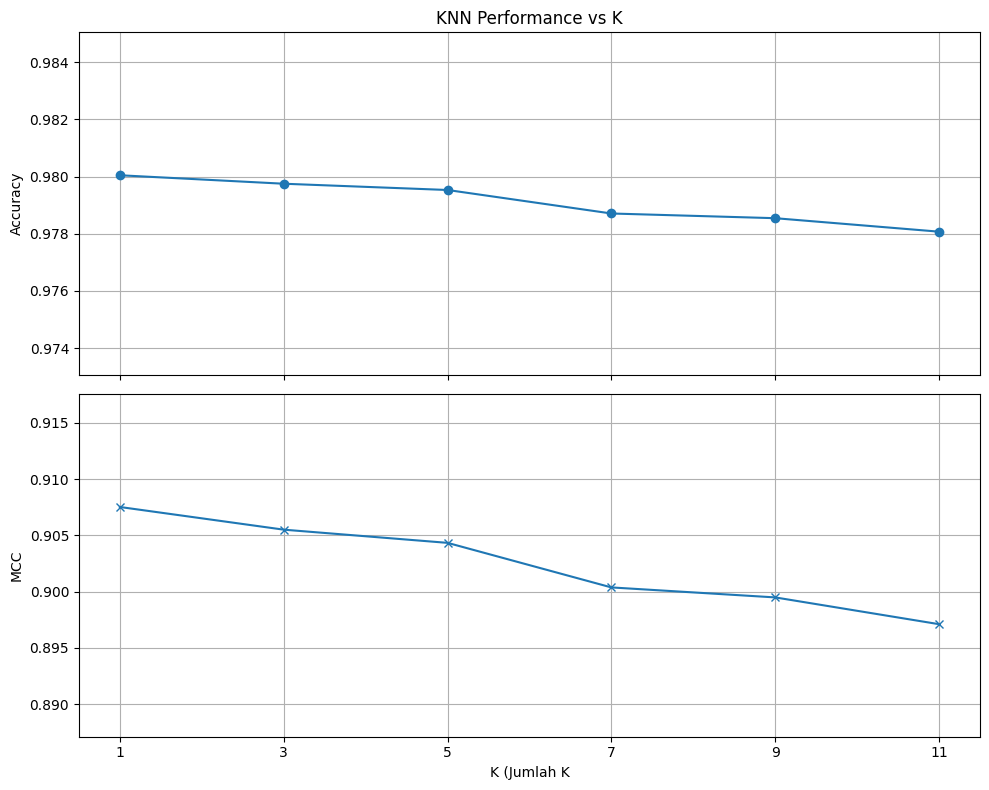

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_neighbors_list, mean_acc_knn, marker='o')
axes[0].set_ylabel("Accuracy")
axes[0].set_title("KNN Performance vs K")
axes[0].grid(True)
axes[0].set_ylim(min(mean_acc_knn)-0.005, max(mean_acc_knn)+0.005)

# MCC
axes[1].plot(n_neighbors_list, mean_mcc_knn, marker='x')
axes[1].set_xlabel("K (Jumlah K")
axes[1].set_ylabel("MCC")
axes[1].grid(True)
axes[1].set_ylim(min(mean_mcc_knn)-0.01, max(mean_mcc_knn)+0.01)

plt.xticks(n_neighbors_list)

plt.tight_layout()
plt.show()

# **LOGISTIC REGRESION**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef

C_list = [0.001, 0.01, 0.1, 1, 10, 100]

mean_acc_lr = []
mean_mcc_lr = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("  LOGISTIC REGRESSION EVALUATION")
print("===============================\n")

for C in C_list:

    print("\n\n=====================")
    print(f"        C = {C}")
    print("=====================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    # Cross Validation of each hyperparemeter tuning
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # Model Logistic Regression
        model = LogisticRegression(C=C, max_iter=3000, solver='lbfgs')

        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time:{pred_time:.5f} sec")

        fold_counter += 1

    mean_acc_lr.append(np.mean(acc_all))
    mean_mcc_lr.append(np.mean(mcc_all))

    print("\n>>> RESULT for C =", C)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")


  LOGISTIC REGRESSION EVALUATION



        C = 0.001

===== Fold 1 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.98520
MCC: 0.93063
Training Time:  0.93859 sec
Prediction Time:0.00189 sec

===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.98246
MCC: 0.91751
Training Time:  0.63775 sec
Prediction Time:0.00188 sec

===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.98219
MCC: 0.91667
Training Time:  0.77704 sec
Prediction Time:0.00184 sec

===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.98191
MCC: 0.91602
Training Time:  0.65762 sec
Prediction Time:0.00182 sec

===== Fold 5 ====
Selected features: ['wmc', 'sloc', 'lloc', 'bl

**Visualitation of Evaluation Result of C**

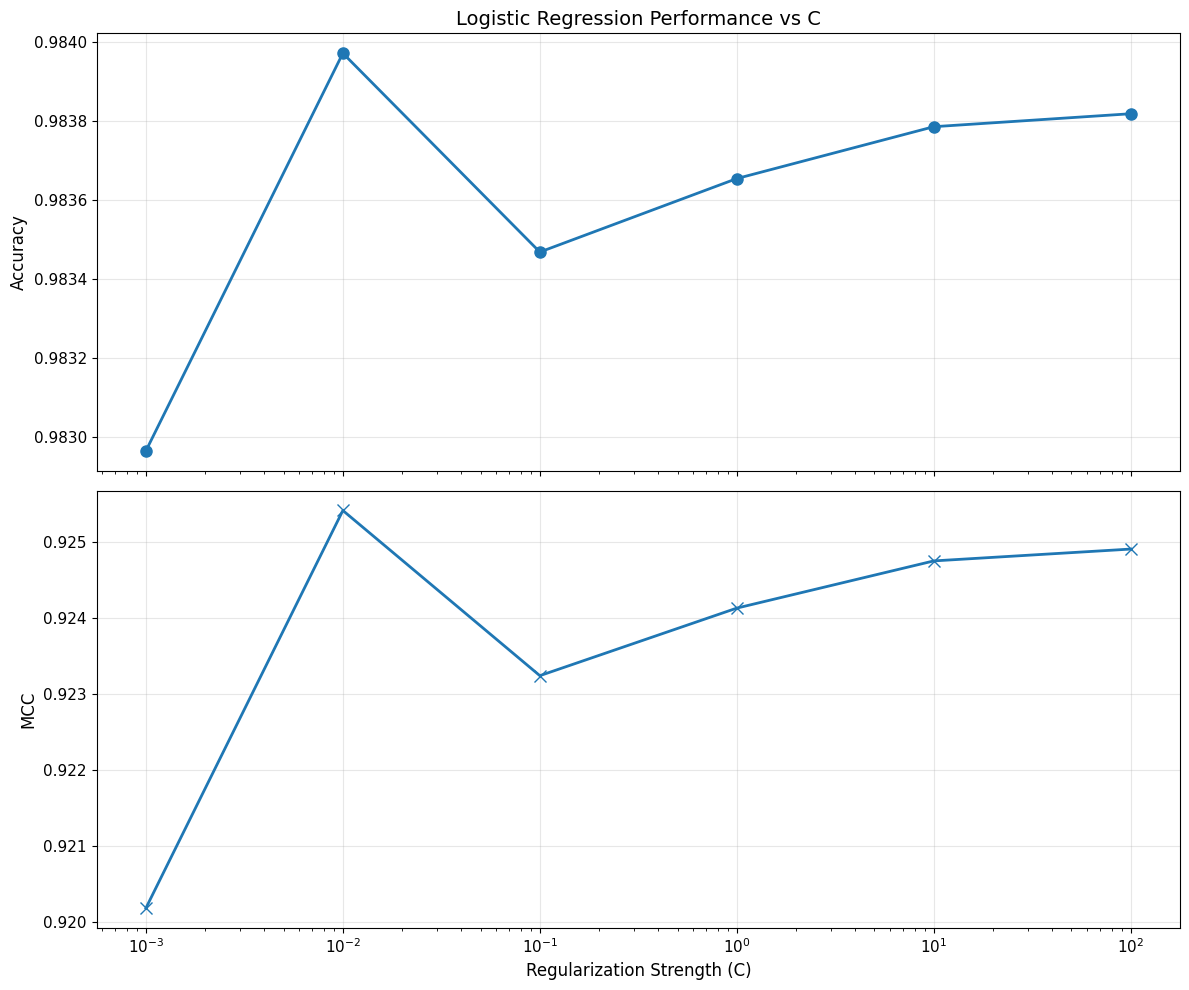

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Accuracy
axes[0].plot(C_list, mean_acc_lr, marker='o', linewidth=2, markersize=8)
axes[0].set_xscale('log')
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].set_title("Logistic Regression Performance vs C", fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='both', labelsize=11)

# MCC
axes[1].plot(C_list, mean_mcc_lr, marker='x', linewidth=2, markersize=8)
axes[1].set_xscale('log')
axes[1].set_xlabel("Regularization Strength (C)", fontsize=12)
axes[1].set_ylabel("MCC", fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='both', labelsize=11)

# Set X-ticks agar sesuai angka
plt.xticks(C_list)

plt.tight_layout()
plt.show()

# **MLP**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

hidden_layer_sizes_list = [4, 8, 16, 32, 64, 100]

mean_acc_mlp = []
mean_mcc_mlp = []
train_time_all = []
predict_time_all = []
fold_counter = 1

# Repeated Cross Validation 5 times and 5 split
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("      MLP CLASSIFIER EVALUATION")
print("===============================\n")

for h in hidden_layer_sizes_list:

    print("\n\n======================")
    print(f"  Hidden Layer = {h}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1

    # Cross Validation
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # MLP model
        model = MLPClassifier(
            hidden_layer_sizes=(h,),
            activation='relu',
            solver='adam',
            max_iter=2000,
            random_state=42
        )

        # Train time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Predict time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        model.fit(X_train_scaled, y_train_fold)
        y_pred = model.predict(X_test_scaled)

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_mlp.append(np.mean(acc_all))
    mean_mcc_mlp.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for Hidden Layer =", hidden_layer_sizes_list)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


      MLP CLASSIFIER EVALUATION



  Hidden Layer = 4

===== Fold 1 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.98548
MCC: 0.93234
Training Time:  3.01753 sec
Prediksi Time:  0.00173 sec

===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97506
MCC: 0.88543
Training Time:  2.68228 sec
Prediksi Time:  0.00230 sec

===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.97725
MCC: 0.90131
Training Time:  1.91843 sec
Prediksi Time:  0.00180 sec

===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.96465
MCC: 0.82884
Training Time:  2.21356 sec
Prediksi Time:  0.00341 sec

===== Fold 5 ====
Selected features: ['wmc', 'sloc', 'lloc', 'bl

**Visualitation of Evaluation Result of hidden_layer**

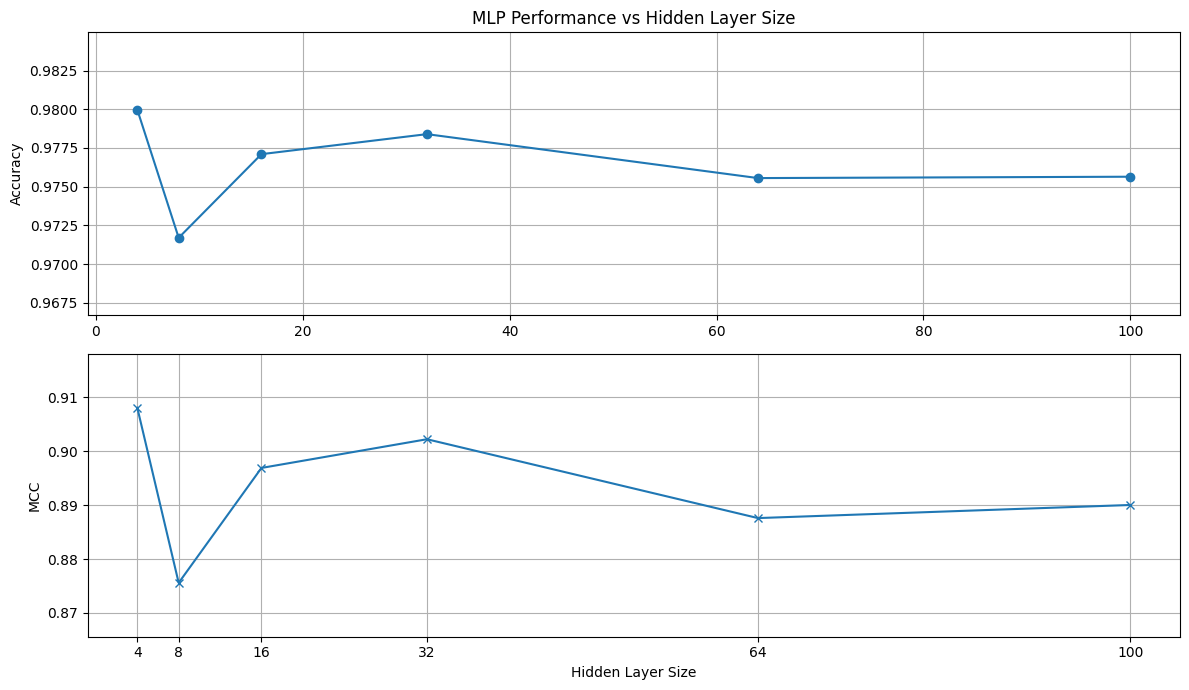

In [ ]:
plt.figure(figsize=(12, 7))

# Accuracy
plt.subplot(2, 1, 1)
plt.plot(hidden_layer_sizes_list, mean_acc_mlp, marker='o')
plt.title("MLP Performance vs Hidden Layer Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_mlp) - 0.005, max(mean_acc_mlp) + 0.005)

# MCC
plt.subplot(2, 1, 2)
plt.plot(hidden_layer_sizes_list, mean_mcc_mlp, marker='x')
plt.xlabel("Hidden Layer Size")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_mlp) - 0.01, max(mean_mcc_mlp) + 0.01)

plt.xticks(hidden_layer_sizes_list)

plt.tight_layout()
plt.show()

# **TABNET**

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
import time
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np
import torch
import pandas as pd

# attention and decision
n_d_a_list = [8, 16, 32, 64]

mean_acc_tabnet = []
mean_mcc_tabnet = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("         TABNET EVALUATION")
print("===============================\n")

for dim in n_d_a_list:

    print(f"\n\n======================\n  n_d = n_a = {dim}\n======================")

    acc_all = []
    mcc_all = []
    train_time_all_fold = []
    predict_time_all_fold = []
    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx].values
        y_test_fold  = y_train.iloc[test_idx].values

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)

        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        X_train_scaled_tabnet = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled
        X_test_scaled_tabnet = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled

        # TabNet model
        model = TabNetClassifier(
            n_d=dim,
            n_a=dim,
            n_steps=5,
            gamma=1.3,
            lambda_sparse=1e-4,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=1e-3),
            verbose=0,
            seed=42
        )

        # Train time
        start_train = time.time()
        model.fit(
            X_train_scaled_tabnet, y_train_fold,
            eval_set=[(X_test_scaled_tabnet, y_test_fold)],
            eval_metric=['accuracy'],
            max_epochs=100,
            patience=30
        )
        train_time = time.time() - start_train

        # Predict time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled_tabnet)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all_fold.append(train_time)
        predict_time_all_fold.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_tabnet.append(np.mean(acc_all))
    mean_mcc_tabnet.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all_fold)
    mean_pred = np.mean(predict_time_all_fold)

    print(f"\n>>> RESULT for n_d = n_a = {dim}")
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


         TABNET EVALUATION



  n_d = n_a = 8

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.95807


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.95807
MCC: 0.80262
Training Time:  64.04242 sec
Prediksi Time:  0.10157 sec

Early stopping occurred at epoch 47 with best_epoch = 17 and best_val_0_accuracy = 0.95643


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.95643
MCC: 0.78882
Training Time:  53.42095 sec
Prediksi Time:  0.10309 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.95177


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.95177
MCC: 0.77158
Training Time:  50.31797 sec
Prediksi Time:  0.15138 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95752


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.95752
MCC: 0.80560
Training Time:  48.65718 sec
Prediksi Time:  0.14091 sec

Early stopping occurred at epoch 45 with best_epoch = 15 and best_val_0_accuracy = 0.95806


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.95806
MCC: 0.81162
Training Time:  50.38762 sec
Prediksi Time:  0.10894 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.95944


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.95944
MCC: 0.80836
Training Time:  47.07944 sec
Prediksi Time:  0.14801 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.95752


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.95752
MCC: 0.80794
Training Time:  46.58543 sec
Prediksi Time:  0.10809 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.95286


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'E', 'T', 'N2', 'η2', 'N', 'η', 'D', 'N1']
Accuracy: 0.95286
MCC: 0.78124
Training Time:  46.58834 sec
Prediksi Time:  0.10453 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.95286


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.95286
MCC: 0.77230
Training Time:  46.40871 sec
Prediksi Time:  0.10630 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.96107


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'η2', 'N2', 'N', 'η', 'D', 'N1']
Accuracy: 0.96107
MCC: 0.82279
Training Time:  46.73117 sec
Prediksi Time:  0.10385 sec

Early stopping occurred at epoch 45 with best_epoch = 15 and best_val_0_accuracy = 0.95451


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.95451
MCC: 0.78429
Training Time:  50.63663 sec
Prediksi Time:  0.10611 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95369


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.95369
MCC: 0.77711
Training Time:  49.50955 sec
Prediksi Time:  0.10139 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.95643


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.95643
MCC: 0.79982
Training Time:  47.96633 sec
Prediksi Time:  0.10407 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.96191


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.96191
MCC: 0.81906
Training Time:  48.34917 sec
Prediksi Time:  0.10932 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95916


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.95916
MCC: 0.80580
Training Time:  50.13692 sec
Prediksi Time:  0.10454 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.95944


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.95944
MCC: 0.81245
Training Time:  47.16724 sec
Prediksi Time:  0.10919 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.96821


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.96821
MCC: 0.85810
Training Time:  47.05712 sec
Prediksi Time:  0.10389 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.94903


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'E', 'T', 'B', 'V', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.94903
MCC: 0.76257
Training Time:  46.77758 sec
Prediksi Time:  0.16374 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.95862


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'N', 'N2', 'η', 'D', 'N1']
Accuracy: 0.95862
MCC: 0.81689
Training Time:  46.70337 sec
Prediksi Time:  0.10217 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.95203


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.95203
MCC: 0.76764
Training Time:  47.57108 sec
Prediksi Time:  0.09993 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.96109


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'η2', 'N', 'η', 'N2', 'D', 'N1']
Accuracy: 0.96109
MCC: 0.82280
Training Time:  48.05833 sec
Prediksi Time:  0.10827 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'T', 'E', 'V', 'B', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.95095
MCC: 0.75937
Training Time:  49.39455 sec
Prediksi Time:  0.16710 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.9556


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.95560
MCC: 0.79585
Training Time:  45.83980 sec
Prediksi Time:  0.10169 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95259


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.95259
MCC: 0.77903
Training Time:  49.70722 sec
Prediksi Time:  0.10863 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.95724


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.95724
MCC: 0.79987
Training Time:  49.88642 sec
Prediksi Time:  0.14989 sec

>>> RESULT for n_d = n_a = 8
Mean Accuracy: 0.95664
Mean MCC: 0.79734
Mean Train Time:    48.99922 sec
Mean Predict Time:  0.11666 sec


  n_d = n_a = 16

Early stopping occurred at epoch 57 with best_epoch = 27 and best_val_0_accuracy = 0.95971


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.95971
MCC: 0.80282
Training Time:  75.04851 sec
Prediksi Time:  0.17935 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.97013


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97013
MCC: 0.85669
Training Time:  128.55290 sec
Prediksi Time:  0.11724 sec
Stop training because you reached max_epochs = 100 with best_epoch = 79 and best_val_0_accuracy = 0.96355


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.96355
MCC: 0.82281
Training Time:  128.50383 sec
Prediksi Time:  0.11818 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.97205


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.97205
MCC: 0.86652
Training Time:  130.20127 sec
Prediksi Time:  0.18830 sec
Stop training because you reached max_epochs = 100 with best_epoch = 79 and best_val_0_accuracy = 0.96382


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.96382
MCC: 0.82446
Training Time:  129.15820 sec
Prediksi Time:  0.11802 sec

Early stopping occurred at epoch 92 with best_epoch = 62 and best_val_0_accuracy = 0.95752


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.95752
MCC: 0.79138
Training Time:  120.28110 sec
Prediksi Time:  0.17770 sec
Stop training because you reached max_epochs = 100 with best_epoch = 77 and best_val_0_accuracy = 0.96081


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.96081
MCC: 0.80891
Training Time:  128.81063 sec
Prediksi Time:  0.12421 sec
Stop training because you reached max_epochs = 100 with best_epoch = 74 and best_val_0_accuracy = 0.96492


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'E', 'T', 'N2', 'η2', 'N', 'η', 'D', 'N1']
Accuracy: 0.96492
MCC: 0.83034
Training Time:  129.09590 sec
Prediksi Time:  0.11778 sec
Stop training because you reached max_epochs = 100 with best_epoch = 90 and best_val_0_accuracy = 0.97095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.97095
MCC: 0.86100
Training Time:  129.85909 sec
Prediksi Time:  0.20002 sec

Early stopping occurred at epoch 67 with best_epoch = 37 and best_val_0_accuracy = 0.96464


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'η2', 'N2', 'N', 'η', 'D', 'N1']
Accuracy: 0.96464
MCC: 0.82849
Training Time:  88.65735 sec
Prediksi Time:  0.11456 sec
Stop training because you reached max_epochs = 100 with best_epoch = 89 and best_val_0_accuracy = 0.97013


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97013
MCC: 0.85653
Training Time:  129.33329 sec
Prediksi Time:  0.11740 sec

Early stopping occurred at epoch 76 with best_epoch = 46 and best_val_0_accuracy = 0.96136


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.96136
MCC: 0.81143
Training Time:  99.93605 sec
Prediksi Time:  0.11973 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.95917


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.95917
MCC: 0.80001
Training Time:  129.61077 sec
Prediksi Time:  0.11907 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.97013


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.97013
MCC: 0.85699
Training Time:  130.48363 sec
Prediksi Time:  0.12240 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.96628


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.96628
MCC: 0.83707
Training Time:  129.15730 sec
Prediksi Time:  0.12016 sec
Stop training because you reached max_epochs = 100 with best_epoch = 75 and best_val_0_accuracy = 0.96739


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.96739
MCC: 0.84256
Training Time:  129.75476 sec
Prediksi Time:  0.12106 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.97287


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.97287
MCC: 0.87056
Training Time:  129.39832 sec
Prediksi Time:  0.11634 sec
Stop training because you reached max_epochs = 100 with best_epoch = 86 and best_val_0_accuracy = 0.96657


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'E', 'T', 'B', 'V', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.96657
MCC: 0.83875
Training Time:  129.74692 sec
Prediksi Time:  0.11446 sec
Stop training because you reached max_epochs = 100 with best_epoch = 77 and best_val_0_accuracy = 0.96437


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'N', 'N2', 'η', 'D', 'N1']
Accuracy: 0.96437
MCC: 0.82743
Training Time:  128.70321 sec
Prediksi Time:  0.11904 sec

Early stopping occurred at epoch 54 with best_epoch = 24 and best_val_0_accuracy = 0.95559


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.95559
MCC: 0.78095
Training Time:  71.04887 sec
Prediksi Time:  0.11779 sec

Early stopping occurred at epoch 66 with best_epoch = 36 and best_val_0_accuracy = 0.96109


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'η2', 'N', 'η', 'N2', 'D', 'N1']
Accuracy: 0.96109
MCC: 0.80996
Training Time:  86.66930 sec
Prediksi Time:  0.11800 sec

Early stopping occurred at epoch 59 with best_epoch = 29 and best_val_0_accuracy = 0.95917


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'T', 'E', 'V', 'B', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.95917
MCC: 0.79990
Training Time:  77.95666 sec
Prediksi Time:  0.11532 sec

Early stopping occurred at epoch 79 with best_epoch = 49 and best_val_0_accuracy = 0.96273


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.96273
MCC: 0.81860
Training Time:  103.80745 sec
Prediksi Time:  0.12810 sec

Early stopping occurred at epoch 55 with best_epoch = 25 and best_val_0_accuracy = 0.96218


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.96218
MCC: 0.81614
Training Time:  72.41621 sec
Prediksi Time:  0.18027 sec

Early stopping occurred at epoch 95 with best_epoch = 65 and best_val_0_accuracy = 0.9619


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.96190
MCC: 0.81425
Training Time:  123.47014 sec
Prediksi Time:  0.12354 sec

>>> RESULT for n_d = n_a = 16
Mean Accuracy: 0.96436
Mean MCC: 0.82698
Mean Train Time:    114.38647 sec
Mean Predict Time:  0.13232 sec


  n_d = n_a = 32
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_val_0_accuracy = 0.9852


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.98520
MCC: 0.93055
Training Time:  180.32876 sec
Prediksi Time:  0.15536 sec
Stop training because you reached max_epochs = 100 with best_epoch = 75 and best_val_0_accuracy = 0.97753


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97753
MCC: 0.89329
Training Time:  179.44762 sec
Prediksi Time:  0.15752 sec
Stop training because you reached max_epochs = 100 with best_epoch = 91 and best_val_0_accuracy = 0.98301


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.98301
MCC: 0.92005
Training Time:  178.21042 sec
Prediksi Time:  0.15034 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.97862


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.97862
MCC: 0.89888
Training Time:  194.97319 sec
Prediksi Time:  0.24577 sec

Early stopping occurred at epoch 65 with best_epoch = 35 and best_val_0_accuracy = 0.97122


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.97122
MCC: 0.86200
Training Time:  139.24194 sec
Prediksi Time:  0.27533 sec
Stop training because you reached max_epochs = 100 with best_epoch = 83 and best_val_0_accuracy = 0.98027


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.98027
MCC: 0.90679
Training Time:  187.62489 sec
Prediksi Time:  0.16555 sec
Stop training because you reached max_epochs = 100 with best_epoch = 70 and best_val_0_accuracy = 0.98356


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.98356
MCC: 0.92264
Training Time:  178.65467 sec
Prediksi Time:  0.24591 sec

Early stopping occurred at epoch 91 with best_epoch = 61 and best_val_0_accuracy = 0.97643


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'E', 'T', 'N2', 'η2', 'N', 'η', 'D', 'N1']
Accuracy: 0.97643
MCC: 0.88796
Training Time:  164.67522 sec
Prediksi Time:  0.15112 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.9778


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.97780
MCC: 0.89497
Training Time:  186.80277 sec
Prediksi Time:  0.20764 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.98246


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'η2', 'N2', 'N', 'η', 'D', 'N1']
Accuracy: 0.98246
MCC: 0.91736
Training Time:  216.48056 sec
Prediksi Time:  0.20012 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.97095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97095
MCC: 0.86097
Training Time:  215.56282 sec
Prediksi Time:  0.18388 sec

Early stopping occurred at epoch 94 with best_epoch = 64 and best_val_0_accuracy = 0.98027


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.98027
MCC: 0.90684
Training Time:  203.28819 sec
Prediksi Time:  0.16232 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.97616


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.97616
MCC: 0.88661
Training Time:  178.50899 sec
Prediksi Time:  0.18351 sec
Stop training because you reached max_epochs = 100 with best_epoch = 92 and best_val_0_accuracy = 0.97835


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.97835
MCC: 0.89761
Training Time:  179.33300 sec
Prediksi Time:  0.23875 sec

Early stopping occurred at epoch 96 with best_epoch = 66 and best_val_0_accuracy = 0.98054


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.98054
MCC: 0.90816
Training Time:  172.56441 sec
Prediksi Time:  0.15859 sec

Early stopping occurred at epoch 69 with best_epoch = 39 and best_val_0_accuracy = 0.97095


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.97095
MCC: 0.86071
Training Time:  125.78147 sec
Prediksi Time:  0.16479 sec

Early stopping occurred at epoch 92 with best_epoch = 62 and best_val_0_accuracy = 0.98383


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.98383
MCC: 0.92420
Training Time:  168.41379 sec
Prediksi Time:  0.15720 sec
Stop training because you reached max_epochs = 100 with best_epoch = 82 and best_val_0_accuracy = 0.98164


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'E', 'T', 'B', 'V', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.98164
MCC: 0.91343
Training Time:  181.02290 sec
Prediksi Time:  0.15771 sec

Early stopping occurred at epoch 71 with best_epoch = 41 and best_val_0_accuracy = 0.97314


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'N', 'N2', 'η', 'D', 'N1']
Accuracy: 0.97314
MCC: 0.87193
Training Time:  129.49108 sec
Prediksi Time:  0.21939 sec
Stop training because you reached max_epochs = 100 with best_epoch = 86 and best_val_0_accuracy = 0.97451


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.97451
MCC: 0.87852
Training Time:  195.84942 sec
Prediksi Time:  0.31371 sec
Stop training because you reached max_epochs = 100 with best_epoch = 78 and best_val_0_accuracy = 0.97945


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'η2', 'N', 'η', 'N2', 'D', 'N1']
Accuracy: 0.97945
MCC: 0.90279
Training Time:  188.32327 sec
Prediksi Time:  0.16609 sec

Early stopping occurred at epoch 52 with best_epoch = 22 and best_val_0_accuracy = 0.96876


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'T', 'E', 'V', 'B', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.96876
MCC: 0.84951
Training Time:  109.05460 sec
Prediksi Time:  0.17389 sec

Early stopping occurred at epoch 86 with best_epoch = 56 and best_val_0_accuracy = 0.9778


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.97780
MCC: 0.89476
Training Time:  160.34334 sec
Prediksi Time:  0.22196 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.97287


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97287
MCC: 0.87073
Training Time:  181.73659 sec
Prediksi Time:  0.16598 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.96985


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.96985
MCC: 0.85531
Training Time:  194.35815 sec
Prediksi Time:  0.16078 sec

>>> RESULT for n_d = n_a = 32
Mean Accuracy: 0.97741
Mean MCC: 0.89266
Mean Train Time:    175.60288 sec
Mean Predict Time:  0.19133 sec


  n_d = n_a = 64

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.98109


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.98109
MCC: 0.91161
Training Time:  131.08806 sec
Prediksi Time:  0.28051 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.98548


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.98548
MCC: 0.93191
Training Time:  325.12475 sec
Prediksi Time:  0.26239 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.9789


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η2', 'η', 'N2', 'N1', 'D']
Accuracy: 0.97890
MCC: 0.90132
Training Time:  128.19789 sec
Prediksi Time:  0.38606 sec

Early stopping occurred at epoch 47 with best_epoch = 17 and best_val_0_accuracy = 0.98191


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'E', 'B', 'V', 'T', 'N_hat', 'N', 'η', 'N2', 'η2', 'N1', 'D']
Accuracy: 0.98191
MCC: 0.91493
Training Time:  157.46991 sec
Prediksi Time:  0.25792 sec
Stop training because you reached max_epochs = 100 with best_epoch = 80 and best_val_0_accuracy = 0.98684


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.98684
MCC: 0.93855
Training Time:  328.20043 sec
Prediksi Time:  0.26136 sec
Stop training because you reached max_epochs = 100 with best_epoch = 90 and best_val_0_accuracy = 0.98739


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.98739
MCC: 0.94106
Training Time:  326.49734 sec
Prediksi Time:  0.26438 sec

Early stopping occurred at epoch 47 with best_epoch = 17 and best_val_0_accuracy = 0.98109


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.98109
MCC: 0.91123
Training Time:  157.81737 sec
Prediksi Time:  0.25748 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.97671


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'E', 'T', 'N2', 'η2', 'N', 'η', 'D', 'N1']
Accuracy: 0.97671
MCC: 0.88984
Training Time:  128.43279 sec
Prediksi Time:  0.49251 sec

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.98027


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.98027
MCC: 0.90740
Training Time:  135.47656 sec
Prediksi Time:  0.28209 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.98739


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'η2', 'N2', 'N', 'η', 'D', 'N1']
Accuracy: 0.98739
MCC: 0.94108
Training Time:  330.74153 sec
Prediksi Time:  0.26579 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.97698


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'E', 'T', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.97698
MCC: 0.89089
Training Time:  145.36925 sec
Prediksi Time:  0.25727 sec
Stop training because you reached max_epochs = 100 with best_epoch = 92 and best_val_0_accuracy = 0.98904


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'N2', 'η2', 'D', 'N1']
Accuracy: 0.98904
MCC: 0.94884
Training Time:  322.44124 sec
Prediksi Time:  0.25576 sec
Stop training because you reached max_epochs = 100 with best_epoch = 72 and best_val_0_accuracy = 0.98493


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η2', 'η', 'D', 'N1']
Accuracy: 0.98493
MCC: 0.92923
Training Time:  323.11157 sec
Prediksi Time:  0.37223 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.97999


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.97999
MCC: 0.90562
Training Time:  143.35629 sec
Prediksi Time:  0.25766 sec
Stop training because you reached max_epochs = 100 with best_epoch = 82 and best_val_0_accuracy = 0.98821


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'N_hat', 'T', 'E', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.98821
MCC: 0.94495
Training Time:  323.37602 sec
Prediksi Time:  0.25819 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.9863


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.98630
MCC: 0.93581
Training Time:  321.94054 sec
Prediksi Time:  0.25291 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.98438


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'N_hat', 'T', 'E', 'N', 'η2', 'η', 'N2', 'D', 'N1']
Accuracy: 0.98438
MCC: 0.92661
Training Time:  320.26039 sec
Prediksi Time:  0.25729 sec

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.98027


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'E', 'T', 'B', 'V', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.98027
MCC: 0.90671
Training Time:  152.73866 sec
Prediksi Time:  0.26205 sec

Early stopping occurred at epoch 80 with best_epoch = 50 and best_val_0_accuracy = 0.98657


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'N', 'N2', 'η', 'D', 'N1']
Accuracy: 0.98657
MCC: 0.93727
Training Time:  259.15865 sec
Prediksi Time:  0.26139 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.983


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η', 'η2', 'N2', 'D', 'N1']
Accuracy: 0.98300
MCC: 0.92005
Training Time:  320.37565 sec
Prediksi Time:  0.26167 sec

Early stopping occurred at epoch 95 with best_epoch = 65 and best_val_0_accuracy = 0.98685


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['wmc', 'sloc', 'lloc', 'blank', 'V', 'B', 'E', 'T', 'N_hat', 'η2', 'N', 'η', 'N2', 'D', 'N1']
Accuracy: 0.98685
MCC: 0.93842
Training Time:  309.45976 sec
Prediksi Time:  0.37472 sec

Early stopping occurred at epoch 68 with best_epoch = 38 and best_val_0_accuracy = 0.97808


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'T', 'E', 'V', 'B', 'N_hat', 'N', 'η2', 'N2', 'η', 'D', 'N1']
Accuracy: 0.97808
MCC: 0.89601
Training Time:  221.44431 sec
Prediksi Time:  0.25214 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.98301


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'B', 'V', 'E', 'T', 'N_hat', 'η2', 'η', 'N', 'N2', 'D', 'N1']
Accuracy: 0.98301
MCC: 0.92008
Training Time:  323.38137 sec
Prediksi Time:  0.27807 sec

Early stopping occurred at epoch 95 with best_epoch = 65 and best_val_0_accuracy = 0.98602


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'η2', 'N2', 'η', 'N1', 'D']
Accuracy: 0.98602
MCC: 0.93465
Training Time:  309.58874 sec
Prediksi Time:  0.25165 sec

Early stopping occurred at epoch 49 with best_epoch = 19 and best_val_0_accuracy = 0.97341


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['wmc', 'lloc', 'sloc', 'blank', 'V', 'B', 'T', 'E', 'N_hat', 'N', 'N2', 'η', 'η2', 'D', 'N1']
Accuracy: 0.97341
MCC: 0.87307
Training Time:  161.80121 sec
Prediksi Time:  0.28048 sec

>>> RESULT for n_d = n_a = 64
Mean Accuracy: 0.98296
Mean MCC: 0.91989
Mean Train Time:    244.27401 sec
Mean Predict Time:  0.28576 sec


**Visualitation of Evaluation Result of attention and decision**

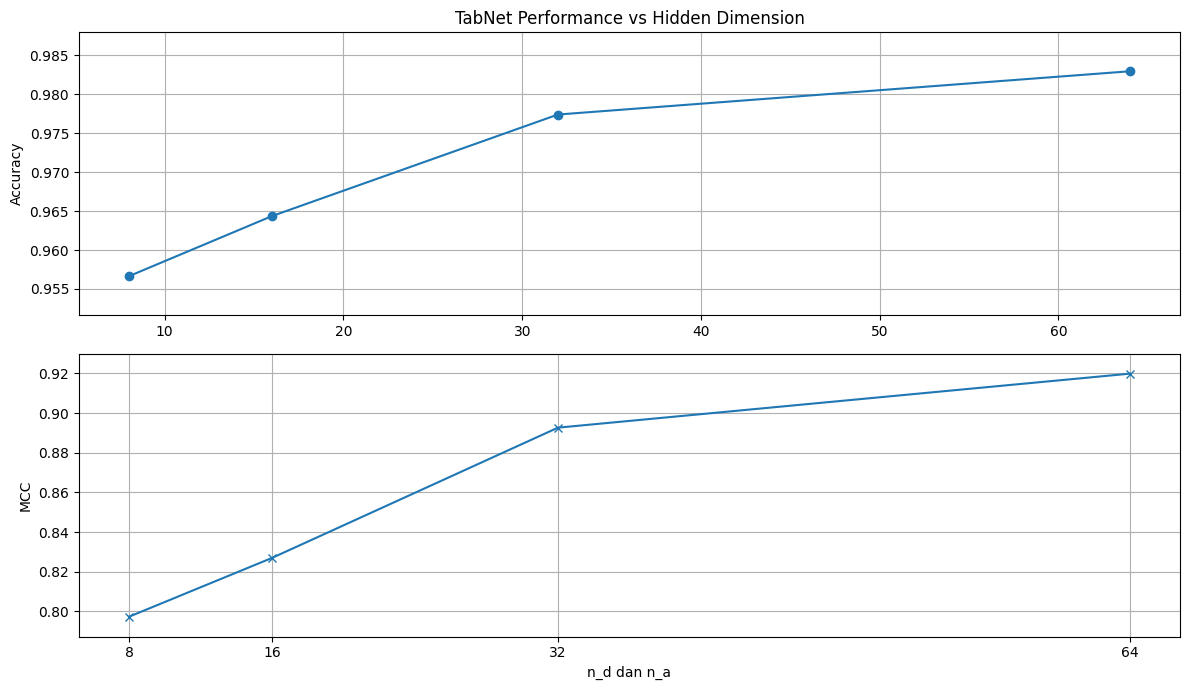

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(n_d_a_list, mean_acc_tabnet, marker='o')
plt.title("TabNet Performance vs Hidden Dimension")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_tabnet) - 0.005, max(mean_acc_tabnet) + 0.005)

# Plot MCC
plt.subplot(2, 1, 2)
plt.plot(n_d_a_list, mean_mcc_tabnet, marker='x')
plt.xlabel("n_d dan n_a")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_tabnet) - 0.01, max(mean_mcc_tabnet) + 0.01)

plt.xticks(n_d_a_list)

plt.tight_layout()
plt.show()